In [1]:
from imports import *
from exactDiagMethods import perform_exact_diag, build_exact_diag_hamiltonian
from globalMethods import *
from vqteMethods import hamiltonian_generation, perform_vqte

In [2]:

def main():
    
    # Initialize the simulation parameters
    gamma = 1
    eps = 1
    mu = 1
    T = 1
    beta=1/T
    F = 1/(np.exp(beta*(eps-mu))+1)

    time = 1
    dt = 0.01
    nt = int(time/dt)


    # Generate Hamiltonians
    ham_real, ham_imag = hamiltonian_generation(eps, gamma, mu, T)
    exact_diag_ham = build_exact_diag_hamiltonian(eps)


    #Build initial states
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)
    
    
    # Perform exact diagonalization
    exact_diag_results, time_points, superoperator = perform_exact_diag(gamma, F, dt, nt, exact_diag_init_state, exact_diag_ham)

    difference = compare_superoperator_to_vqte(superoperator, ham_real, ham_imag)
    print("This is the superoperator", superoperator)
    print("Ham real ", ham_real)
    print("This is the difference." , difference)

    # Perform VQTE simulation
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, mu, T, dt, nt, ansatz, init_param_values)

    # Output results
    output_results(vqte_results, exact_diag_results, time, nt, eps, mu, T, time_points)

Is Hermitian: True
Trace: (0.9999999999999999+4.898587196589413e-16j) (should be 1)
Eigenvalues: [-1.2246468e-16  1.0000000e+00]
All eigenvalues ≥ 0: False
Purity (Tr(ρ²)): (1+9.797174393178826e-16j) (should be 1 for pure state)
Initial expectation value of number operator: (-1.224646799147353e-16+8.998558695971146e-32j)
This is the superoperator [[-0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j -0.5-1.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -0.5+1.j  0. +0.j]
 [ 0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]]
Ham real  SparsePauliOp(['IZ', 'ZI', 'XY', 'YX'],
              coeffs=[-0.5+0.j,  0.5+0.j, -0. +0.j, -0. +0.j])
This is the difference. [[-1.11022302e-16+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   1.11022302e-16+0.j]
 [ 0.00000000e+00+0.j -1.11022302e-16+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.11022302e-16+0.j
   0.00000000e+00+0.j]
 [ 1.11022302e-16+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  -1.11022302e-16+0.j]]
Density Matrix :

c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


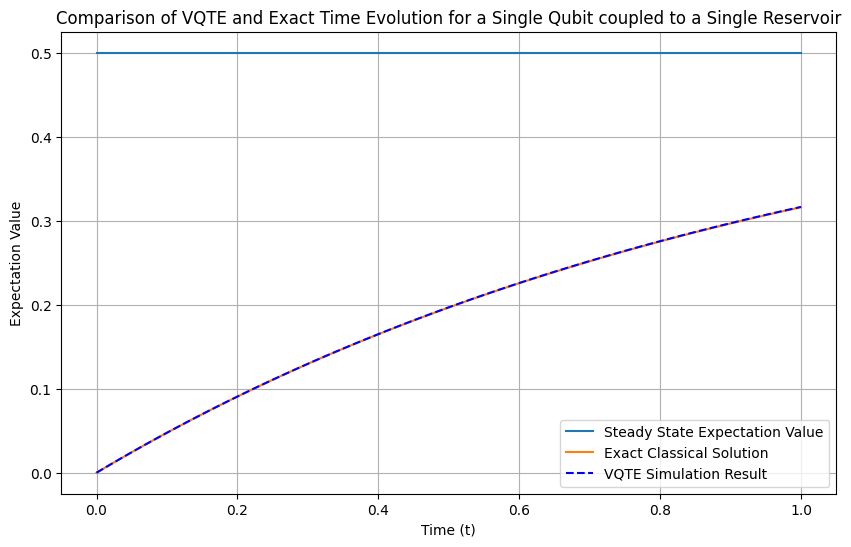

In [3]:
main()